In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [2]:
import json
import os

kaggle_data = {
    "username": "julia1805",
    "key": "KGAT_52a57e351d52b09eb112f743c4ff6a3c"
}

os.makedirs("/root/.kaggle", exist_ok=True)

with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(kaggle_data, f)

os.chmod("/root/.kaggle/kaggle.json", 0o600)


In [3]:
!pip install kaggle
!kaggle --version


Kaggle API 1.7.4.5


In [4]:
!kaggle datasets list | head


ref                                                                title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
neurocipher/heartdisease                                           Heart Disease                                            3491  2025-12-11 15:29:14.327000           2114        324  1.0              
mabubakrsiddiq/retail-store-product-sales-simulation-dataset       🏪 Retail Store Product Sales Simulation Dataset       1383545  2026-01-16 13:12:07.310000              0         28  1.0              
saidaminsaidaxmadov/chocolate-sales                                Chocolate Sales                                        468320  2026-01-04 14:23:35.490000              0         61  1.0     

In [5]:
!kaggle datasets download -d shayanfazeli/heartbeat
!unzip heartbeat.zip
!ls


Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
License(s): unknown
 94% 93.0M/98.8M [00:00<00:00, 965MB/s]
100% 98.8M/98.8M [00:00<00:00, 974MB/s]
Archive:  heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        
heartbeat.zip	 mitbih_train.csv    ptbdb_normal.csv
mitbih_test.csv  ptbdb_abnormal.csv  sample_data


In [10]:
import pandas as pd

train_df = pd.read_csv("mitbih_train.csv", header=None)
test_df  = pd.read_csv("mitbih_test.csv", header=None)

print(mitbih_train.shape)
print(mitbih_test.shape)


(87554, 188)
(21892, 188)


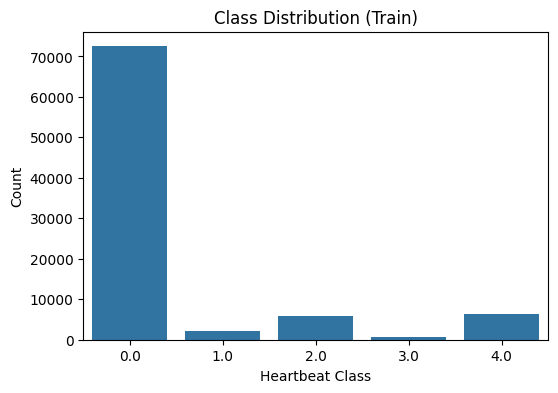

In [11]:
y_train = train_df.iloc[:, -1]
y_test  = test_df.iloc[:, -1]

plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Class Distribution (Train)")
plt.xlabel("Heartbeat Class")
plt.ylabel("Count")
plt.show()


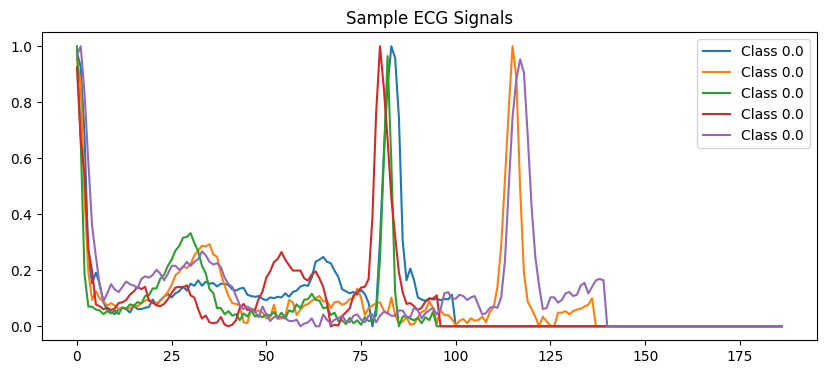

In [12]:
plt.figure(figsize=(10,4))
for i in range(5):
    plt.plot(train_df.iloc[i, :-1], label=f"Class {y_train.iloc[i]}")
plt.title("Sample ECG Signals")
plt.legend()
plt.show()

In [24]:
import numpy as np

X_train = mitbih_train.iloc[:, :-1].values
y_train = mitbih_train.iloc[:, -1].values

X_test  = mitbih_test.iloc[:, :-1].values
y_test  = mitbih_test.iloc[:, -1].values

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(87554, 187, 1) (87554,)
(21892, 187, 1) (21892,)


In [25]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(enumerate(class_weights))
print("Class weights:", class_weight_dict)


Class weights: {0: np.float64(0.24162492583240192), 1: np.float64(7.877103013945119), 2: np.float64(3.0253628196268143), 3: np.float64(27.317940717628705), 4: np.float64(2.7228735810915876)}


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv1D(32, kernel_size=5, activation="relu", input_shape=(187,1)),
    MaxPooling1D(pool_size=2),

    Conv1D(64, kernel_size=5, activation="relu"),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(5, activation="softmax")
])

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 183, 32)        │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 91, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 87, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 43, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2752)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       176,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 187,013 (730.52 KB)

 Trainable params: 187,013 (730.52 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=128,
    validation_split=0.2,
    class_weight=class_weight_dict,
    verbose=1
)

Epoch 1/30
548/548 ━━━━━━━━━━━━━━━━━━━━ 38s 67ms/step - accuracy: 0.9893 - loss: 0.0330 - val_accuracy: 0.1387 - val_loss: 36.6111
Epoch 2/30
548/548 ━━━━━━━━━━━━━━━━━━━━ 30s 55ms/step - accuracy: 1.0000 - loss: 3.6087e-06 - val_accuracy: 0.1387 - val_loss: 48.6173
Epoch 3/30
548/548 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 1.0000 - loss: 7.4908e-07 - val_accuracy: 0.1387 - val_loss: 57.0907
Epoch 4/30
548/548 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 1.0000 - loss: 9.9195e-07 - val_accuracy: 0.1387 - val_loss: 65.5708
Epoch 5/30
548/548 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 1.0000 - loss: 1.7759e-06 - val_accuracy: 0.1387 - val_loss: 76.6488
Epoch 6/30
548/548 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 1.0000 - loss: 7.5064e-08 - val_accuracy: 0.1387 - val_loss: 80.7184
Epoch 7/30
548/548 ━━━━━━━━━━━━━━━━━━━━ 29s 54ms/step - accuracy: 1.0000 - loss: 2.6578e-07 - val_accuracy: 0.1387 - val_loss: 88.3072
Epoch 8/30
548/548 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - acc

In [28]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.8276


In [29]:
y_pred = np.argmax(model.predict(X_test), axis=1)

print("Prediction distribution:")
print(np.unique(y_pred, return_counts=True))

685/685 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
Prediction distribution:
(array([0]), array([21892]))


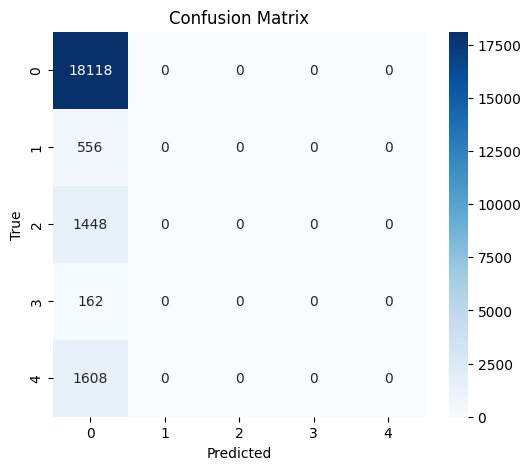

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     18118
         1.0       0.00      0.00      0.00       556
         2.0       0.00      0.00      0.00      1448
         3.0       0.00      0.00      0.00       162
         4.0       0.00      0.00      0.00      1608

    accuracy                           0.83     21892
   macro avg       0.17      0.20      0.18     21892
weighted avg       0.68      0.83      0.75     21892



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
